## Trigger Conceps

Most particle physics experiments will use a trigger during data acquisition as opposed to streaming out the data continuously. A trigger is a signal that tells the data aquisition system to read out the detector data corresponding to an instance in time (an event) for storage. The latency of a trigger decision is dictated by the buffer size of the system: A trigger decision cannot take longer than the time you can afford to temporarily store the detector data for consecutive events of interests.


### Why does ATLAS need a trigger

The environment at the proton-proton interaction point is extremely busy: We have up to 60 proton interactions per bunch crossings, and 30 million bunch crossings per second!

<img src="https://s-media-cache-ak0.pinimg.com/originals/3e/cd/07/3ecd07951c28fd36eee321274c82310a.jpg" width="500" />

ATLAS needs a way to be _highly selective_ of the events of interest to keep: Without a trigger system we would need to find a way to record > 40 TB of data per second! 

### What does the trigger select?

"Highly selective" often simply means a requirement of an event to contain reconstructed particles with transverse momentum or energy, $p_T$ or $E_T$, above a certain threshold.

**Why?** This is because the $p_T$/$E_T$ distribution of background particles is exponentially falling:
<img src="http://opendata.atlas.cern/release/2020/documentation/8TeVDoc/pictures/Output/jet_pt.jpg" width="500" />
Meaning:
- Energetic events (in transverse plane) are more interesting because of the lower background rate.
- The $p_T$ threshold is an easy way to controlling trigger rates with intensifying LHC conditions.
    
 > **It does not mean there is no interesting physics below threshold! It is just much more challenging to look there.**

Beside a requirement on the minimum $p_T$, a trigger selection can also require:
- A certain multiplicity of objects, e.g. 4 hadronic jets with $p_T$ > 100 GeV.
- Additional requirements on particle characteristic, e.g. minimum of 2 hadronic jets that have an 85% probability of being initiated by a bottom quark ("b-tagging").
- And even requirements on the event topology, e.g. a requirement of two jets with a high combined invariant mass.

In reality, we have 100s of trigger selections that run parallel, deciding separately what events to keep. 


### The impact of triggers on physics analysis

Beside irrevocably determing which events are stored for an analysis, the decision also impacts the sensitivity of your analysis.
The latter is not only because it will dictate the energy threshold of leading particles in your events for analysis! As already stated, the triggers are required to make a decision within a certain amount of time. This gives them limited amount of time to reconstruct particles to base the decisions on, meaning we will not reconstruct particles as precisely online as we would in stored data. In addition, refinements such as calibration constants and detector alignments can be done later on on offline stored data, which may again deteriote the online reconstruction performance with respect to offline reconstruction performance.

There are therefore two important concepts related to trigger and your physics analysis:
* *Important Trigger Concept 1*: Because of our highly selective trigger, our dataset is heavily biased. When analysing data, the very first step is to choose the trigger that is most appropriate for your physics analysis (the one that has the largest acceptance for your signal) and then filter the data based on whether that trigger fired.
* *Important Trigger Concept 2*: Your selection of physics events will depend on the trigger selection _and_ selection efficiency when the data was taken: Electrons reconstructed more precisely offline may not have had the same measured $p_T$ online, nor have even been correctly identified as an electron.


### Measuring trigger efficiencies

We usually measure the trigger efficiency via "**trigger efficiency turn-on curves**". Turn-on curves simply measure the number of events kept by the trigger/total number of events$^*$ for events containing your signal, as a function of one of the variables used in the trigger selection, usually the $p_T$ of the reconstructed particles.


So let's first get to grips with the concept of trigger turn-ons.


$^*$_By the way, you may ask how do we know the total number of events if they were not triggered by our chosen trigger? What are your ideas?_






# Exercise 1: Emulating a single jet trigger

For the first exercise, we will be emulating a simple jet trigger by generating the momentum spectra of online and offline reconstructed jets. This allows us to study the performance of the trigger in detail: What impacts the trigger performance?

In [1]:
import numpy
import matplotlib.pyplot as plt

In [ ]:
#%matplotlib notebook

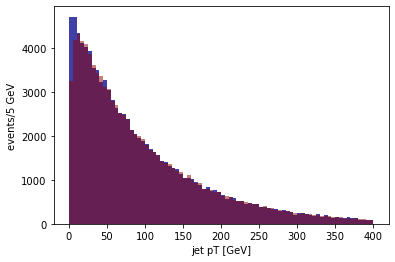

In [2]:
# A trigger turn-on emulator for a jet trigger

## First we generate (our exponentially falling pT) spectrum for the offline reconstructed leading jet

col_off = 'darkblue'
col_on = 'darkred'
col_off_kept = 'green'

samples=int(1e5)

offline_jets_pt = 100*numpy.random.exponential(scale=1, size=samples)
## cut out jets below zero

# --- histogram settings --- 
bin_width = 5 # GeV
h_min = 0
h_max = 400
bins = int((h_max-h_min)/bin_width)

plt.hist(offline_jets_pt,bins=bins, range=[h_min,h_max], alpha=0.5, color=col_off)

## We then generated the pT spectrum of the online reconstructed leading jets
## Online reconstruction is not the same as offline due to resolution differences! We'll quantify the 
## the difference between online and offline jets via a resolution parameter, sigma.

sigma = 5.
gauss = numpy.random.normal(loc=0,scale=sigma, size=samples)

online_jets_pt = offline_jets_pt + gauss

plt.hist(offline_jets_pt,bins=bins, range=[h_min,h_max], alpha=0.5, color=col_off)
plt.hist(online_jets_pt,bins=bins, range=[h_min,h_max], alpha=0.5, color=col_on)

plt.ylabel(f"events/{bin_width} GeV")
plt.xlabel("jet pT [GeV]")
plt.show()

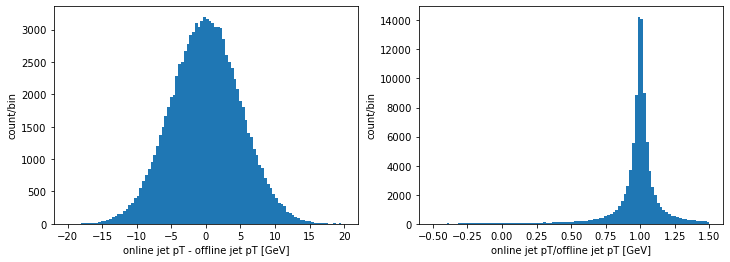

standard deviation of distribution = 5.0 GeV


In [26]:
## Now we plot the online vs offline response.
## This should have a spread determined by our sigma set above.

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,4)

pt_ratio = online_jets_pt/offline_jets_pt
pt_diff = online_jets_pt-offline_jets_pt

ax1.hist(pt_diff, bins=100, range=[-20,20])
ax1.set_ylabel(f"count/bin")
ax1.set_xlabel("online jet pT - offline jet pT [GeV]")
ax2.hist(pt_ratio, bins=100, range=[-0.5,1.5])
ax2.set_ylabel(f"count/bin")
ax2.set_xlabel("online jet pT/offline jet pT [GeV]")
plt.show()

print("standard deviation of distribution = %.1f GeV"%(pt_diff.std()))

Minimum offline jet pT:  133.1700364964153
Maximum offline jet pT:  1492.4783182402612


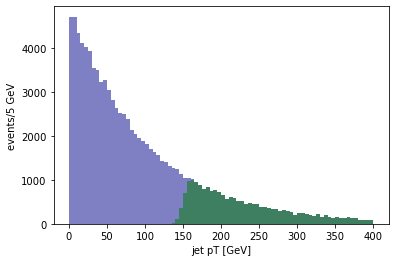

In [27]:
## Finally we emulate the trigger selection:

## trigger function
apply_trigger = lambda x, t: x>t  # is x over threshold


threshold = 150. # GeV

# we check if online jet is above trigger threshold
triggered_events = apply_trigger(online_jets_pt, threshold)  

# we get the offline jets for events in which the trigger fired
offline_jets_pt_kept = offline_jets_pt[triggered_events]     
 
print("Minimum offline jet pT: ", offline_jets_pt_kept.min())
print("Maximum offline jet pT: ", offline_jets_pt_kept.max())


plt.hist(offline_jets_pt,bins=bins, range=[h_min,h_max], alpha=0.5, color=col_off)
plt.hist(offline_jets_pt_kept,bins=bins, range=[h_min,h_max], alpha=0.5, color=col_off_kept)

plt.ylabel(f"events/{bin_width} GeV")
plt.xlabel("jet pT [GeV]")
plt.show()

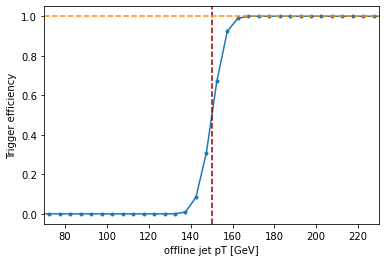

In [28]:
# Now we plot our trigger turn-on: We plot triggered events/total events per bin. 

cnt_total,edges = numpy.histogram(offline_jets_pt, bins=bins, range=[h_min,h_max])
cnt_kept,edges = numpy.histogram(offline_jets_pt_kept, bins=bins, range=[h_min,h_max])

eff = cnt_kept/cnt_total
centered_pt = (edges+bin_width*0.5)[:-1] # recompute bin edges to plot center of pT bin vs efficiency

plt.plot(centered_pt, eff, marker=".")

plt.xlim(threshold*0.5-sigma, threshold*1.5+sigma)
plt.axvline(threshold,0,1.0, linestyle='--', color='darkred')
plt.axhline(1.0,0,threshold*1.5+sigma,linestyle='--', color='darkorange')


plt.ylabel(f"Trigger efficiency")
plt.xlabel("offline jet pT [GeV]")
plt.show()

## Measuring jet trigger performance

You can see that

(1) The trigger turn-on is not a step function at threshold: There is a gradual turn on of the trigger efficiency, reaching 100% after the trigger threshold.

(2) We eventually reach 100% trigger efficiency once the offline jet pT is high enough.

Analysis using hadronic jets typically ensure that they are working in a region where the trigger is almost 100% efficient, by simply selecting events where the leading offline jet pT is greater than the point where the trigger turn-on curve reaches 99%. This means, events collected below the 99% turn-on point are wasted rate. 

One can measure the performance of the trigger by (1) measuring the jet pT @ 99% turn-on and (2) measuring the fraction of events that are wasted. 
A good trigger will have a 99% turn-on that is close to threshold, and as little

In [ ]:
## Measuring jet trigger performance

pt_at_99 = centered_pt[eff>=0.99][0]
total_events_triggered = offline_jets_pt_kept.size
total_events_for_physics = offline_jets_pt_kept[offline_jets_pt_kept>=pt_at_99].size
wasted_frac = (total_events_triggered-total_events_for_physics)/total_events_triggered

print("99%% trigger efficiency @ jet pT = %i GeV "%(pt_at_99))
print("Number of triggered events = ", total_events_triggered)
print("Number of events for analysis = ", total_events_for_physics)
print("fraction of wasted events = %.2f"%(wasted_frac))

In [ ]:
## Measuring jet trigger performance

pt_at_99 = centered_pt[eff>=0.99][0]
total_events_triggered = offline_jets_pt_kept.size
total_events_for_physics = offline_jets_pt_kept[offline_jets_pt_kept>=pt_at_99].size
wasted_frac = (total_events_triggered-total_events_for_physics)/total_events_triggered

print("99%% trigger efficiency @ jet pT = %i GeV "%(pt_at_99))
print("Number of triggered events = ", total_events_triggered)
print("Number of events for analysis = ", total_events_for_physics)
print("fraction of wasted events = %.2f"%(wasted_frac))

# Exercise: Measuring the performance of a single lepton trigger 

Next we will do the same thing, but for a single electron trigger and using open data: Specifically a Monte-Carlo sample that contains a decay of a top and an anti-top quark which each decay leptonically (muons or electrons).

In [ ]:
%jsroot on

In [ ]:
import ROOT

base_url = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/"
input_file =  "mc_410000.ttbar_lep.2lep.root"
tree_name = "mini" # event "tree" in which information of each event in the data set are defined:
                   # event level information, particles and their properties

# function to retrieve the data from an input file.
#events = uproot.open(f"{base_url}/{input_file}:{tree_name}")
#events.show()

infile = ROOT.TFile.Open(f"{base_url}/{input_file}")
tree = infile.Get("mini")
tree.GetEntries()

In [ ]:
#list_of_variables = ['photon_pt', 'photon_eta', 'photon_phi','scaleFactor_PhotonTRIGGER', 'trigP', 'photon_n', 'photon_trigMatched' ]  # <-- ADD YOUR VARIABLES HERE
#list_of_variables = ['lep_pt', 'lep_eta', 'lep_phi','scaleFactor_LepTRIGGER', 'trigE', 'lep_n', 'lep_trigMatched', 'lep_type', 'trigM' ]  # <-- ADD YOUR VARIABLES HERE
#max_events = 100000
#event_info = events.arrays(list_of_variables, library="np", entry_stop=max_events) 

tree.Print()

In [ ]:
canvas = ROOT.TCanvas("Canvas", "c", 800, 600)

# --- histogram settings --- 
bin_width = 5 # GeV
h_min = 0
h_max = 200
bins = int((h_max-h_min)/bin_width)

h_total = ROOT.TH1F("h_total","offline electron pT spectrum; leading offline electron pT [GeV]; events",bins,h_min,h_max)
h_triggered = ROOT.TH1F("h_triggered","triggered offline electron pT spectrum; leading offline electron pT [GeV]; events",bins,h_min,h_max)

h_total.SetLineWidth(2)
h_total.SetLineColor(ROOT.kBlue+2)
h_triggered.SetLineWidth(2)
h_triggered.SetLineColor(ROOT.kOrange+1)

In [ ]:

# Loop through all events: Distinguish between 
# leading electrons from electron triggered events (trigE == True) 
# and leading electrons in all events.

GeV = 1e-3

max_events = 200000

for evt_idx, event in enumerate(tree):
    for l_idx in range(event.lep_n):
        if abs(event.lep_type[l_idx]) == 11:  # 11 is for electron/positron
            electron_pt = event.lep_pt[l_idx]*GeV
            if event.trigE:
                h_triggered.Fill(electron_pt)
            h_total.Fill(electron_pt)
            break # only interested in leading electron
    if evt_idx > max_events: break


In [ ]:
h_total.Draw()
h_triggered.Draw("SAME")
canvas.Draw()

In [ ]:
xmax = 100

## Compute ratio of "triggered" vs "total" electrons/pT bin
eff = ROOT.TEfficiency(h_triggered, h_total)
eff.SetLineWidth(2)


## Draw line to indicate trigger threshold
threshold = 26 # GEV
trig_line = ROOT.TLine(26,0,26,1.0)
trig_line.SetLineColor(ROOT.kRed-2)
trig_line.SetLineWidth(2)
trig_line.SetLineStyle(2)

## Draw line to indicate 100% trigger efficiency
eff_line = ROOT.TLine(0,1.0,xmax,1.0)
eff_line.SetLineColor(ROOT.kOrange+1)
eff_line.SetLineWidth(2)
eff_line.SetLineStyle(2)

eff.Draw()
eff_line.Draw()
trig_line.Draw()
canvas.Draw()

eff.GetPaintedGraph().GetXaxis().SetRangeUser(0,100)
#eff.GetPaintedGraph().GetYaxis().SetRangeUser(0.8,1)
canvas.Draw()

 ### What do we observe?
 
 This matches more or less the officially measured ATLAS trigger efficiency for the 26 GeV single electron trigger:
 
 <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EgammaTriggerPublicResults/plot_Et_e24_lhvloose_nod0_L1EM20VH_ProbeLooseAndBLayerLLH_d0z0_DataDriven_Rel21_Smooth_vTest_LooseAndBLayerLLH_d0z0_DataDriven_Rel21_Smooth_vTest_LHCC_Sep2017.png" width="500" />
 
 
 **Question**: How does this curve look different to the jet trigger turn-ons? Why is it different?
